# Project "Movies by Woody Allen" (IMDB database)

*By Eline De Witte and Anna Jopp*

Woody Allen (born 1935) is one of the best-known contemporary American filmmakers. What sets him apart from his colleagues is, amongst other things, his productivity: His career has been ongoing for over six decades during which he has been involved in more than 70 films – as a director, actor and writer, partly performing two or even three of these roles at once.

Which actors has he worked with most frequently in all those years? How well were his movies received by the audience? Due to the size of Allen's oeuvre, it is not easy to answer such questions without the help of technology. We therefore consider getting to know "The Movies by Woody Allen" an ideal incentive to delve into the IMDB database, a database compiling information about movies, actors, directors and film ratings until 2008. To do so, we will run a total of ten SQL queries that will be outlined in the following.

*Instructions: Import the imdb database (as found on Toledo) into phypmyadmin, name the database "imdb", then run the following code.*

In [1]:
import mysql.connector
import pandas as pd

In [2]:
usrname = "root"
pwd = ""
host = "127.0.0.1"
conn = mysql.connector.connect(host=host, user=usrname, passwd=pwd)
cursor = conn.cursor(buffered=True)

In [3]:
cursor.execute("USE imdb")

## Query 1: How many movies has Woody Allen directed?

In [4]:
cursor.execute(
'''SELECT COUNT(*) AS count_WA FROM movies_directors 
JOIN movies ON movies_directors.movie_id = movies.id 
JOIN directors ON movies_directors.director_id = directors.id 
WHERE directors.first_name='Woody' and directors.last_name='Allen';
''')

In [5]:
q1 = cursor.fetchall()
q1

[(39,)]

The database contains 39 movies that were directed by someone with the first name "Woody" and the last name "Allen". The database we use has information about movies from 1888 to 2008, which means that Allen’s newest movies are not included. Our further queries will thus answer questions about these 39 movies.

## Query 2: Which average rating did Allen's movies receive on IMDB?

In [6]:
cursor.execute(
'''SELECT AVG(rank) AS avg_rating FROM movies_directors 
JOIN movies ON movies_directors.movie_id = movies.id 
JOIN directors ON movies_directors.director_id = directors.id 
WHERE directors.first_name='Woody' and directors.last_name='Allen';
''')

In [7]:
q2 = cursor.fetchall()
q2

[(7.091428579602923,)]

The average rating given to movies directed by Woody Allen on the IMDB website (rating: 1 (worst) to 10 (best)) is 7.09. We also ran queries to know the lowest and highest score his movies received. His lowest rank turns out to be 6.1 and his highest rank is 8.7. We looked for this by changing 'AVG' to 'MIN' and 'MAX', respectively.

## Intermediate Query: Joining three tables

At this point, we decided to join the tables "actors", "directors", and "movies" permanently in a new table called "movie_data" to avoid having to repeat the joining process in every following query. 

In [8]:
cursor.execute(
'''CREATE TABLE IF NOT EXISTS movie_data AS SELECT movie_id, director_id, 
name, rank, year 
FROM movies_directors 
JOIN movies ON movies_directors.movie_id = movies.id 
JOIN directors ON movies_directors.director_id = directors.id 
WHERE directors.first_name='Woody' and directors.last_name='Allen';
''')

This creates a new table in the database, only it doesn't exist already. We did this to avoid getting an error message if this block is exectuted more then once. The new table includes all the movies by Woody Allen and allows us to asks questions about his movies without having to join the 3 tables, movies, movie_directors and directors, everytime.


## Query 3: In which years did Woody Allen direct more than one movie?


In [9]:
sql_query_3=(
'''SELECT DISTINCT m1.year, m1.name as movie_1, m2.name as movie_2
FROM movie_data AS m1 JOIN movie_data AS m2 ON m1.year = m2.year 
WHERE m1.name <> m2.name
GROUP BY m1.year;
''')

In [10]:
df_3 = pd.read_sql(sql_query_3, conn)
df_3.style.set_properties(**{'background-color': 'orange'}, subset=['year'])

,year,movie_1,movie_2
0,1971,Men of Crisis: The Harvey Wallinger Story,Bananas
1,1987,September,Radio Days
2,1989,New York Stories,Crimes and Misdemeanors
3,1992,Shadows and Fog,Husbands and Wives
4,1994,Don't Drink the Water,Bullets Over Broadway
5,2001,Sounds From a Town I Love,"Curse of the Jade Scorpion, The"


In this table we see that, in six years (highlighted in orange), Woody Allen has directed more than one movie per year. Often, Woody Allen's creative peak is said to have been between 1977, when *Annie Hall* was released in the theaters, to 1987. Based on this result, we could argue that his most fruitful decade was later, namely from 1989 to 1999. During that time he managed to produce multiple movies in one year three times!

## Query 4: What are his best rated movies?

In [11]:
sql_query_4=(
'''SELECT * 
FROM movie_data
ORDER BY rank DESC
LIMIT 5;
''')

In [12]:
df_4 = pd.read_sql(sql_query_4, conn)
df_4

,movie_id,director_id,name,rank,year
0,210269,1364,Melinda and Melinda,8.7,2004
1,17760,1364,Annie Hall,8.3,1977
2,204163,1364,Manhattan,8.2,1979
3,73303,1364,Crimes and Misdemeanors,7.9,1989
4,138444,1364,Hannah and Her Sisters,7.8,1986


Woody Allen has directed several films that rank very highly. His highest rated film is *Melinda and Melinda*. The other four movies all fall into his creative period (more or less 1977-1989). Out of curiosity, we ran this query again with a limit of 10. We found out that his second to 8th best ranked movies where all created in the (long) decade after the release of *Annie Hall*. The 6th best ranked movie is *Love and Death* (1975) with a score of 7.6. On the 7th place is *Zelig* with a rank of 7.6. *The Purple Rose of Cairo* is on 8th place, with a rank of 7.5. Movie 9 (*Bullets Over Broadway*) was made in 1994 and broke the streak. However, the 10th movie (*Radio Days*, 1987) was made during his creative decade.

## Query 5: Which genre do most of his movies belong to?

In [13]:
sql_query_5=(
'''SELECT DISTINCT directors_genres.genre, directors_genres.prob
FROM movie_data JOIN directors_genres ON movie_data.director_id=directors_genres.director_id
ORDER BY directors_genres.prob DESC;
''')

In [14]:
df_5 = pd.read_sql(sql_query_5, conn)
df_5

,genre,prob
0,Comedy,0.923077
1,Drama,0.384615
2,Romance,0.256410
3,Crime,0.153846
4,Mystery,0.102564
5,Thriller,0.051282
6,Fantasy,0.051282
7,Short,0.051282
8,Sci-Fi,0.025641
9,Musical,0.025641


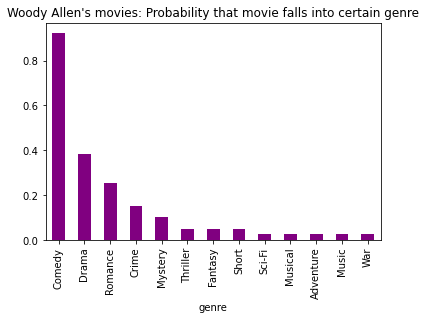

In [27]:
df_5.plot.bar(title='Woody Allen\'s movies: Probability that movie falls into certain genre', 
              x='genre', y='prob', legend=None, color='purple');

This output shows that Woody Allen's movies fall into 13 genres. For reference, there are 21 different genres in the database (found by the query: SELECT DISTINCT genres FROM director_genres). This output shows that Woody Allen's movies have great variety. However, his movies have a probability of 0.92 to fall into the category 'Comedy'. After that, a good portion of his movies also falls into the categories 'Drama' and 'Romance'. That aligns with what is known about him: he also worked as a comedian and his best ranked movies are all romantic comedies with a lot of drama.

## Query 6: Who are the most productive comedy-directors in the database?

In [28]:
sql_query_6=(
'''SELECT first_name, last_name, CONCAT(first_name, ' ', last_name) AS director_name, 
COUNT(director_id) as directorcount
FROM movies_directors JOIN directors ON movies_directors.director_id = directors.id 
    JOIN movies ON movies_directors.movie_id = movies.id 
WHERE director_id IN
    ( SELECT director_id FROM directors_genres WHERE genre = 'Comedy' AND prob > 0.80)
GROUP BY director_id
ORDER BY directorcount DESC
LIMIT 20; 
''')

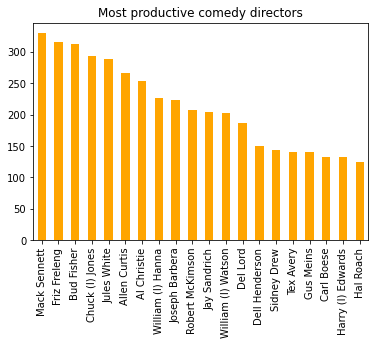

In [29]:
df_6 = pd.read_sql(sql_query_6, conn)
df_6.plot(title='Most productive comedy directors', x='director_name', y='directorcount', 
          kind="bar", xlabel='', legend=None, color='Orange');

The WHERE-line returns 8249 director IDs that have a probability of at least 90% to make comedy movies. Out of these directors, the result shows the 20 most productive ones, measured based on how many films they made. Even though we think it is impressive that Woody Allen directed more or less a movie per year in addition to acting in and writing others, there are clearly directors who made more movies. Mack Sennett for instance made 330 movies in his career. He was known as the 'King of Comedy' and lived from 1880-1960.

## Query 7: Which actors have played in at least six Woody Allen movies?

In [34]:
sql_query_7=(
'''SELECT CONCAT (actors.first_name, ' ', actors.last_name) AS actor_name, id, COUNT(id) AS actorcount 
FROM roles 
JOIN actors ON roles.actor_id= actors.id 
JOIN movie_data ON roles.movie_id= movie_data.movie_id
GROUP BY last_name, first_name 
HAVING actorcount>5
ORDER BY actorcount DESC;
''')

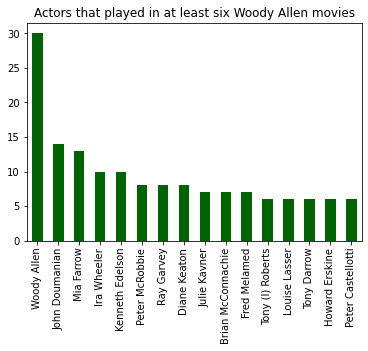

In [30]:
df_7 = pd.read_sql(sql_query_7, conn)
df_7.plot(title='Actors that played in at least six Woody Allen movies', 
          x='actor_name', y='actorcount', kind="bar", xlabel='', legend=None, color='darkgreen');

These 16 actors are the people Woody Allen has most frequently worked with as a director. In first place, we find - no surprise - Allen himself. He played as an actor in 30 of the 39 movies in the database that he also directed. Most of the names at the top are part of Woody Allen's social circle besides work as well. He had, for example, a brief relationship with Diane Keaton and Mia Farrow later was his partner for twelve years.

## Query 8: Let's pick one of these actors: Diane Keaton. Did she play in more movies directed by Allen than by other directors?

In [31]:
sql_query_8=(
'''SELECT a.first_name, a.last_name, CONCAT(d.first_name, ' ', d.last_name) AS director_name, 
count(director_id) as director_count 
FROM actors AS a 
JOIN roles as r on r.actor_id = a.id 
JOIN movies AS m ON r.movie_id=m.id 
JOIN movies_directors as md ON m.id=md.movie_id 
JOIN directors as d ON md.director_id=d.id 
WHERE a.first_name="Diane" and a.last_name="Keaton" 
GROUP BY director_id
HAVING director_count>1;
''')

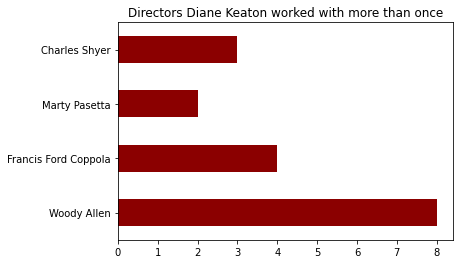

In [32]:
df_8 = pd.read_sql(sql_query_8, conn)
df_8.plot(title='Directors Diane Keaton worked with more than once', x='director_name', 
          kind="barh", xlabel='', legend=None, color='darkred');

Our assumption was right: Diane Keaton played in eight movies directed by Woody Allen - more than she worked with any other director. We did leave out the 39 directors that Keaton only worked with once, as this would make the result unnecessarily long. We did this by adding 'having director_count>1' to our query.

## Query 9: Has Woody Allen worked with more male or more female actors?

In [22]:
sql_query_9=(
'''SELECT DISTINCT gender, COUNT(gender)
FROM actors 
JOIN roles ON actors.id = roles.actor_id
JOIN movie_data ON roles.movie_id = movie_data.movie_id
GROUP BY gender;
''')

In [23]:
df_9 = pd.read_sql(sql_query_9, conn)

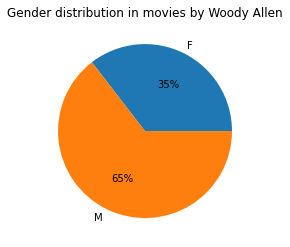

In [33]:
df_9.plot(title='Gender distribution in movies by Woody Allen', kind='pie', y='COUNT(gender)', 
          labels=df_9['gender'], legend=None, ylabel='', autopct='%1.0f%%');

Even though Diane Keaton and other female actors famously appeared in movies directed by Woody Allen, the output of this query shows that almost two thirds of the actors in his movies are male. An actor is counted multiple times if they appear in multiple movies. Diane Keaten for example adds 8 'points' to the female count, because she worked with Woody Allen eight times.

## Query 10: Are there movies *about* Woody Allen?

In [25]:
sql_query_10=(
"""SELECT year, movies.name, first_name, last_name
FROM movies_directors JOIN directors ON movies_directors.director_id = directors.id 
JOIN movies ON movies_directors.movie_id = movies.id 
WHERE name LIKE '%WOODY%' AND name LIKE '%ALLEN%'; ;""")

In [26]:
df_10 = pd.read_sql(sql_query_10, conn)
df_10

,year,name,first_name,last_name
0,1982,"Oeuvre et la vie de Woody Allen, L'",Riccardo,Aragno
1,2005,Woody Allen Summer Project,Woody,Allen
2,2000,Woody und Mr. Allen,Manfred,Behrens
3,1965,Woody Allen,Philip,Casson
4,1980,To Woody Allen from Europe with Love,André,Delvaux
5,1979,Question de temps: Une heure avec Woody Allen,Jacques,Meny
6,2000,Woody Allen: la vida y nada ms,Jorge,Ortiz de Landázuri Yzarduy
7,2000,Woody Allen: la vida y nada ms,Pite,Piñas
8,2002,Castaway: A Woody Allen Film,Corky,Quackenbush
9,2004,Waiting for Woody Allen,Michael,Rainin


There are ten movies that have the words 'Woody' and 'Allen' in the title. Nine of those movies are actually about Woody Allen. The 10th movie is not about Woody Allen. 'Woody Allen Summer Project', is the working title of a movie made by Woody Allen himself. He later gave it an official title, namely 'Match Point', but the 2005 movie does not appear with that name in the database.